In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_excel("survey_data.xlsx")
df.head()

,Purchase Intention,Barrier A,Barrier B,Barrier C,Barrier D,Barrier E,Barrier F,Barrier G,Barrier H,Barrier I,...,Gender,Employment,Income,Education,Marital Status,Ethnicity,Factor1,Factor2,Cluster,Distance
0,3,3,5,3,4,3,3,4,4,4,...,1,2,1,1,1,1,1.611624,-0.079864,1,1.164345
1,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,-1.166406,-1.695504,3,1.180694
2,1,3,5,1,1,1,1,5,1,1,...,1,1,2,1,1,1,0.446483,-1.984862,3,2.369912
3,3,2,3,3,3,3,2,2,1,2,...,1,4,2,1,1,1,-0.771906,0.219910,2,0.156459
4,4,3,3,2,2,3,2,3,2,2,...,1,1,4,1,1,1,0.539196,-0.648088,1,1.235243


In [2]:
# Exploratory Data Analysis (EDA) to check for major flaws

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for inconsistent values in categorical variables
income_values = df["Income"].unique()
purchase_intention_values = df["Purchase Intention"].unique()

# Summary statistics for numerical variables
summary_statistics = df.describe()

# Display findings
missing_values, duplicate_rows, income_values, purchase_intention_values, summary_statistics


(Purchase Intention    0
 Barrier A             0
 Barrier B             0
 Barrier C             0
 Barrier D             0
 Barrier E             0
 Barrier F             0
 Barrier G             0
 Barrier H             0
 Barrier I             0
 Barrier J             0
 Barrier K             0
 Barrier L             0
 Barrier M             0
 Gender                0
 Employment            0
 Income                0
 Education             0
 Marital Status        0
 Ethnicity             0
 Factor1               0
 Factor2               0
 Cluster               0
 Distance              0
 dtype: int64,
 4,
 array([ 1,  2,  4,  7,  3,  5,  6,  8, 10,  9]),
 array([3, 5, 1, 4, 2]),
        Purchase Intention    Barrier A    Barrier B    Barrier C    Barrier D  \
 count         2399.000000  2399.000000  2399.000000  2399.000000  2399.000000   
 mean             3.136307     2.249271     2.639850     3.101709     2.982910   
 std              1.370247     1.120909     1.040231     1.2

## **Explore Purchase Intention**

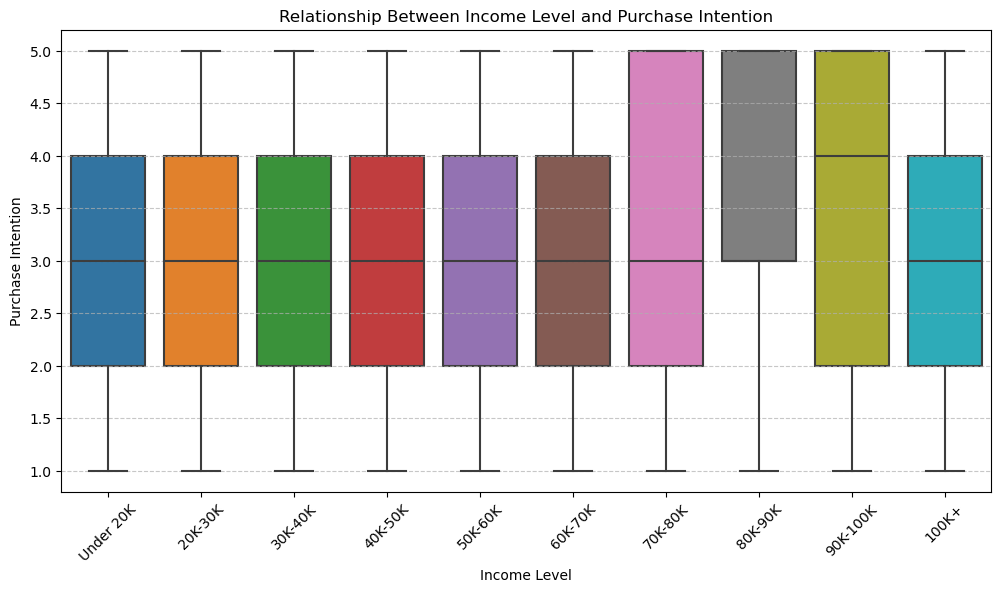

In [3]:
# Convert "Income" to a categorical variable with meaningful labels
income_labels = [
    "Under 20K", "20K-30K", "30K-40K", "40K-50K", "50K-60K", "60K-70K", 
    "70K-80K", "80K-90K", "90K-100K", "100K+"
]
df["Income Category"] = df["Income"].map(lambda x: income_labels[x-1] if 1 <= x <= 10 else "Unknown")

# Create a boxplot to visualize the relationship between income level and purchase intention
plt.figure(figsize=(12, 6))
sns.boxplot(x="Income Category", y="Purchase Intention", data=df, order=income_labels)
plt.xticks(rotation=45)
plt.xlabel("Income Level")
plt.ylabel("Purchase Intention")
plt.title("Relationship Between Income Level and Purchase Intention")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


The median purchase intention does not vary drastically across income groups, suggesting that income level may not be a strong predictor of purchase intention for low-carb beer. However, some income groups exhibit slightly higher median values, such as those in the mid-to-upper income brackets (50K-60K, 70K-80K, 100K+).

The purchase intention is the greatest in Cluster 3

## **Hypothesis Testing**

In [19]:
from scipy.stats import ttest_ind

# Extract purchase intention for the two income groups
group_9 = df[df["Income"] == 9]["Purchase Intention"]
group_10 = df[df["Income"] == 10]["Purchase Intention"]

# Calculate the mean difference
mean_diff = round(group_9.mean() - group_10.mean(), 2)

# Perform a one-tailed t-test to check if group_9 has a larger mean than group_10
t_stat, p_value = ttest_ind(group_9, group_10, alternative="greater", equal_var=False)

# Round p-value for reporting
p_value_rounded = round(p_value, 4)

mean_diff, p_value_rounded


(0.16, 0.146)

The difference in average purchase intention between Group 9 and Group 10 is 0.16. The p-value from the one-tailed t-test is 0.146.


The positive difference suggests, on average, customers in Group 9 have a higher purchase intention than those in Group 10. The p-value is above significance thresholds.

In [20]:
# Perform an independent two-sample t-test (two-tailed) to compare means
t_stat, p_value = ttest_ind(group_9, group_10, equal_var=False)

# Round the p-value for reporting
p_value_rounded = round(p_value, 2)

p_value_rounded

0.29

The p-value from the two-sample t-test is 0.29. 

This p-value is quite high, indicating no statistically significant difference in purchase intention between Group 9 (90,000 to less than 100,000) and Group 10 (100,000 or more). The observed difference in means (0.16) is likely due to random variation rather than a meaningful effect.

## **Factor Analysis**

In [6]:
pip install factor-analyzer


Note: you may need to restart the kernel to use updated packages.


Questions with low communalities (suggested for removal):
     Question  Factor 1  Factor 2  Communality
1   Barrier B      0.40      0.12       0.1744
2   Barrier C      0.37      0.33       0.2458
3   Barrier D      0.25      0.30       0.1525
5   Barrier F      0.51      0.25       0.3226
6   Barrier G      0.38      0.09       0.1525
12  Barrier M      0.29      0.45       0.2866


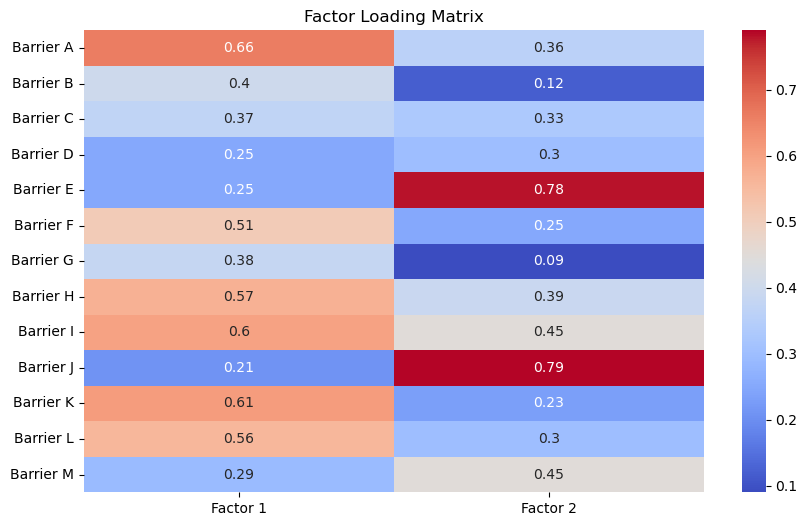

Remaining Questions after Removal:
    Question  Factor 1  Factor 2  Communality
0  Barrier A      0.66      0.36       0.5652
1  Barrier E      0.25      0.78       0.6709
2  Barrier H      0.57      0.39       0.4770
3  Barrier I      0.60      0.45       0.5625
4  Barrier J      0.21      0.79       0.6682
5  Barrier K      0.61      0.23       0.4250
6  Barrier L      0.56      0.30       0.4036


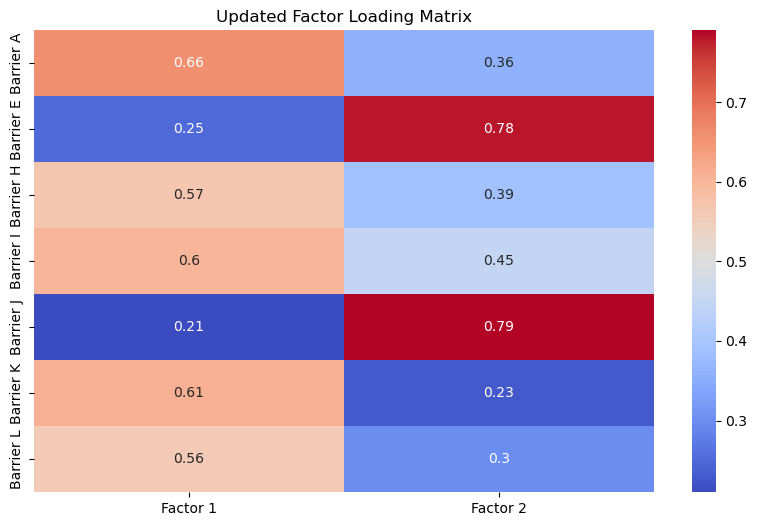

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# Factor Loading Matrix
data = {
    "Question": ["Barrier A", "Barrier B", "Barrier C", "Barrier D", "Barrier E", 
                 "Barrier F", "Barrier G", "Barrier H", "Barrier I", "Barrier J",
                 "Barrier K", "Barrier L", "Barrier M"],
    "Factor 1": [0.66, 0.40, 0.37, 0.25, 0.25, 0.51, 0.38, 0.57, 0.60, 0.21, 0.61, 0.56, 0.29],
    "Factor 2": [0.36, 0.12, 0.33, 0.30, 0.78, 0.25, 0.09, 0.39, 0.45, 0.79, 0.23, 0.30, 0.45]
}

df = pd.DataFrame(data)

# Define Factor Analysis Model
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
loadings = np.array([df["Factor 1"], df["Factor 2"]]).T

# Find Communalities (how well each question explains the factor structure)
communalities = np.sum(loadings**2, axis=1)

# Identify questions with low communalities
df["Communality"] = communalities

# Print questions with low communalities (suggested for removal)
print("Questions with low communalities (suggested for removal):")
print(df[df["Communality"] < 0.4])

# Visualize Factor Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", xticklabels=["Factor 1", "Factor 2"], yticklabels=df["Question"])
plt.title("Factor Loading Matrix")
plt.show()

# Identify and remove questions with low communalities (< 0.4)
df_filtered = df[df["Communality"] >= 0.4].reset_index(drop=True)

# Print the remaining questions after removal
print("Remaining Questions after Removal:")
print(df_filtered)

# Visualize Updated Factor Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered[["Factor 1", "Factor 2"]], annot=True, cmap="coolwarm",
            xticklabels=["Factor 1", "Factor 2"], yticklabels=df_filtered["Question"])
plt.title("Updated Factor Loading Matrix")
plt.show()


After comparing the factor similarities with the related questions, we can assume that the factors are as follows: 

Factor 1: Social Perception & Acceptance

Factor 2: Taste & Authenticity Concerns

## **Cluster Analysis**

Cluster Centers (Output of K-Means Clustering): 

    Cluster |   Factor 1  |  Factor 2

        1          0.76       0.29

        2         -0.72       0.56

        3         -0.49      -1.05

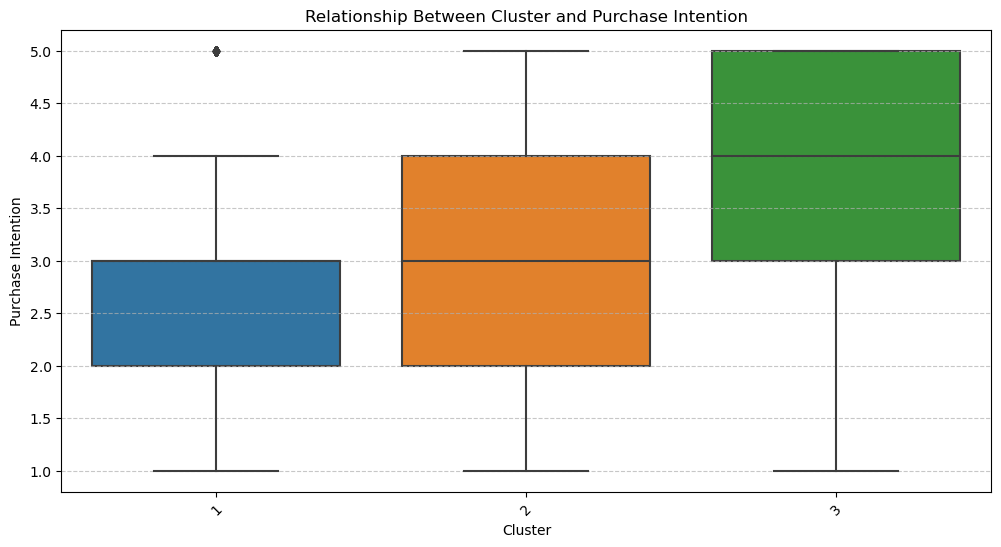

In [7]:
# Create a boxplot to visualize the relationship between cluster and purchase intention
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="Purchase Intention", data=df)
plt.xticks(rotation=45)
plt.xlabel("Cluster")
plt.ylabel("Purchase Intention")
plt.title("Relationship Between Cluster and Purchase Intention")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


### **Choosing target customer**

Based off of Cluster 3's purchase intention, I would choose them as the target customer, as they have substantially more intent than the other segments. Given their results in the factor analysis/cluster centers, this segment has a little concern for the social perception aspect and really doesn't care about the taste, they prioritize health benefits over social trends. This makes them the most likely to purcahse in higher volumes. 

### **Appealing to Cluster 3 Customers**

To appeal to Cluster 3, the ad should emphasize health benefits and functionality over social trends. Highlight premium ingredients and taste-test approvals. Cluster 3 buyers don’t prioritize social trends, avoid influencer-driven campaigns. Instead, focus on personal benefits and product quality.

In [9]:
df = pd.read_excel("survey_data.xlsx")

# Create a contingency table for (Cluster, Employment Status) pairs
contingency_table = pd.crosstab(df["Cluster"], df["Employment"])

# Display the table
contingency_table


Employment,1,2,3,4,5
Cluster,,,,,
1,724,100,57,142,39
2,464,53,52,95,16
3,451,52,49,89,16


In [10]:
# Calculate the share of each cluster within each employment status
cluster_shares = contingency_table.div(contingency_table.sum(axis=0), axis=1).round(2)

# Display the table with shares
cluster_shares


Employment,1,2,3,4,5
Cluster,,,,,
1,0.44,0.49,0.36,0.44,0.55
2,0.28,0.26,0.33,0.29,0.23
3,0.28,0.25,0.31,0.27,0.23


In [11]:
# Define total ad budget for impressions
total_impressions = 10000 # assumed 10,000 budget

# Allocate impressions based on employment status distribution in Cluster 1
impressions_per_status = (cluster_shares.loc[3] * total_impressions).round(0).astype(int)

# Display the number of "Target Segment" customers who would see the ad
impressions_per_status


Employment
1    2800
2    2500
3    3100
4    2700
5    2300
Name: 3, dtype: int64

### **Cluster 3's Employment Status Target**

I would target self-employed individuals (3,100 impressions) since they have the largest reach in Cluster 3 (highest purchase intention). They prioritize health benefits over social trends, are independent decision-makers, and align with a functional, results-driven message focused on low-carb advantages and product quality over influencer appeal.

Modify the ad to focus on health and performance benefits with messaging like “Fuel your success with fewer carbs.” Reassure on taste and quality, highlighting premium ingredients. Position it as a smart, functional choice with data-driven comparisons, appealing to independent, health-conscious self-employed individuals who prioritize results.

## **Ad Recommendation**


I would recommend an ad emphasizing the health benefits, performance, and  product quality with messaging like “Fuel your success with fewer carbs” and “A smarter beer choice for driven individuals.” It reassures on taste and positions the beer as a functional, results-driven choice. Chose this ad because these customers show the highest purchase intention and within that segment there is a diverse array of occupations, but mostly revolve around being driven individuals wether that is school, work, or being self employed. This ad will not only target the largest portion of the occupations, but will also relate to the other segments. This sector of customers is mainly concerned with the health affects of beer, so being able to emphasize how this product is better than "regular" beer for their minds and bodies will go a long way. 


The ad will be mainly be targeted at self-employed individuals since they have the largest reach in  our segment of cumstomers with the highest purchase intention. This segment values health-conscious choices over social trends, making them independent decision-makers most likely to purchase. But also by targeting the segment this way, we are also encompassing the larger scope of this segement of high-intent customers by focuses on their minds and bodies. 